# Products' Preprocessing

This notebook contains exploratory analysis on the products from the Dunnhumby's dataset *product.csv*. Furthermore, it extracts food products then divides into categories as products contain meat, pure meats and vegetables.

At the end of this notebook, the following .csv files are created:
* food_products.csv
* meat_products.csv
* pure_meat_products.csv
* vegetables_products.csv

## Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import re
from requests import get
from bs4 import BeautifulSoup

default_figsize = (12.8, 4.8)

## Data

In [2]:
df_products = pd.read_csv('dunnhumby/product.csv', sep = ',')
df_products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [3]:
print('There are {0} rows and {1} columns in the dataset.'.format(len(df_products), len(df_products.columns))) 

There are 92353 rows and 7 columns in the dataset.


In [4]:
print('Number of columns with missing values is {0}.'.format(len(df_products.columns.to_numpy()[df_products.isna().any()])))

Number of columns with missing values is 0.


In [5]:
print('Columns:')
print('--------')
for col in df_products.columns:
    print(col)

Columns:
--------
PRODUCT_ID
MANUFACTURER
DEPARTMENT
BRAND
COMMODITY_DESC
SUB_COMMODITY_DESC
CURR_SIZE_OF_PRODUCT


In [6]:
print('There are {0} unique products distributed in {1} different departments.'.format(len(df_products['PRODUCT_ID'].unique()), len(df_products['DEPARTMENT'].unique())))

There are 92353 unique products distributed in 44 different departments.


## Food Data

In [7]:
food_dep = ['GROCERY', 'PASTRY', 'MEAT-PCKGD','SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI',
       'MEAT', 'SEAFOOD', 'SALAD BAR', 'GRO BAKERY','FROZEN GROCERY', 'SPIRITS', 'RESTAURANT',
       'DAIRY DELI', 'CHEF SHOPPE', 'DELI/SNACK BAR', 'PORK']

In [8]:
df_food_products = df_products[df_products.DEPARTMENT.isin(food_dep)].copy()
print('There are {0} unique food products distributed in {1} different departments.'.format(len(df_food_products['PRODUCT_ID'].unique()), len(df_food_products['DEPARTMENT'].unique())))

There are 56031 unique food products distributed in 18 different departments.


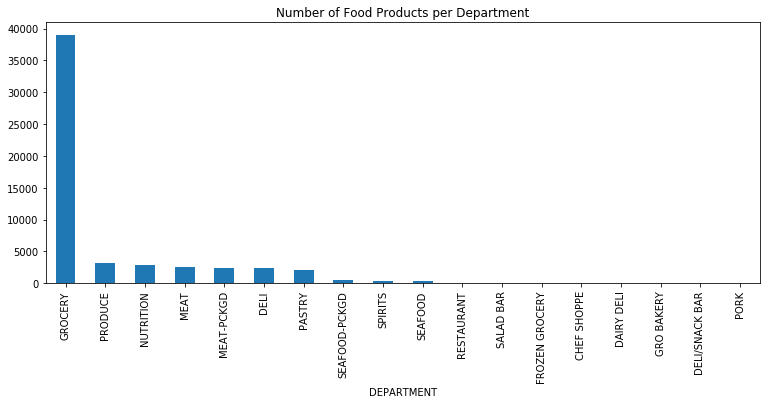

In [9]:
df_food_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar(figsize = default_figsize)
plt.title('Number of Food Products per Department');

In [10]:
percent = int(len(df_food_products[df_food_products.DEPARTMENT == 'GROCERY']) * 100 / len(df_food_products))
print(f'The GROCERY department contains nearly {percent}% of the products in the food sector. It may be useful to have a deeper look in it for better information on the type of products it contains.')

The GROCERY department contains nearly 69% of the products in the food sector. It may be useful to have a deeper look in it for better information on the type of products it contains.


In [11]:
df_food_products[df_food_products.DEPARTMENT == 'GROCERY'].COMMODITY_DESC.unique()

array(['FRZN ICE', 'FRUIT - SHELF STABLE', 'COOKIES/CONES',
       'SPICES & EXTRACTS', 'PNT BTR/JELLY/JAMS',
       'ICE CREAM/MILK/SHERBTS', 'AIR CARE', 'CHEESE', 'SHORTENING/OIL',
       'COFFEE', 'PAPER HOUSEWARES', 'BAKED BREAD/BUNS/ROLLS',
       'VEGETABLES - SHELF STABLE', 'HISPANIC', 'DINNER MXS:DRY',
       'CONDIMENTS/SAUCES', 'FRZN VEGETABLE/VEG DSH', 'BAKING NEEDS',
       'FRZN FRUITS', 'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG',
       'DRY MIX DESSERTS', 'PICKLE/RELISH/PKLD VEG', 'BAKING MIXES',
       'FLUID MILK PRODUCTS', 'SOUP', 'BAKED SWEET GOODS',
       'DRY BN/VEG/POTATO/RICE', 'FACIAL TISS/DNR NAPKIN', 'FROZEN PIZZA',
       'EGGS', 'REFRGRATD DOUGH PRODUCTS', 'HOT CEREAL', 'COLD CEREAL',
       'SUGARS/SWEETNERS', 'SEAFOOD - SHELF STABLE', 'CANNED JUICES',
       'BAG SNACKS', 'BEANS - CANNED GLASS & MW', 'CRACKERS/MISC BKD FD',
       'CONVENIENT BRKFST/WHLSM SNACKS', 'SOFT DRINKS', 'BUTTER',
       'FRZN MEAT/MEAT DINNERS', 'WATER - CARBONATED/FLVRD D

It is clearly seen that some of the COMMODITY_DESC correspond to housecleaning and non-food commodities. 
Therefore, they have to be removed in the next step.

In [12]:
non_food_groceries = ['AIR CARE', 'PAPER HOUSEWARES', 'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG', 'FACIAL TISS/DNR NAPKIN',\
                     'LAUNDRY DETERGENTS', 'LAUNDRY ADDITIVES', 'CAT FOOD', 'BATH TISSUES', 'DOG FOODS', 'BLEACH', 'PAPER TOWELS',\
                     'DISHWASH DETERGENTS', 'CAT LITTER', 'COUPON/MISC ITEMS', 'PET CARE SUPPLIES', 'BIRD SEED', 'BOTTLE DEPOSITS']
df_food_products = df_food_products[~df_food_products['COMMODITY_DESC'].isin(non_food_groceries)]
print('There are {0} unique food products distributed in {1} different departments.'.format(len(df_food_products['PRODUCT_ID'].unique()), len(df_food_products['DEPARTMENT'].unique())))

There are 51341 unique food products distributed in 18 different departments.


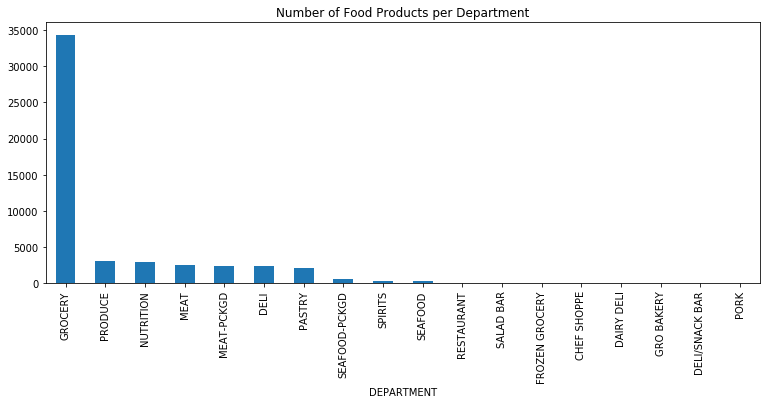

In [13]:
df_food_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar(figsize = default_figsize)
plt.title('Number of Food Products per Department');

In [14]:
df_food_products.to_csv('data/food_products.csv')

## Products with Meat

### Web scraping for meat-related words

To detect meat related products automatically, we use [listchallenges.com](https://www.listchallenges.com/types-of-meat) and [manythings.com](https://www.manythings.org/vocabulary/lists/c/words.php) to get the words related to meat. These words are then used to select all the products whose DEPARTMENT, COMMODITY_DESC or SUB_COMMODITY_DESC contain one of these words.

In [15]:
meat_words = []

# First Website
urls = ["https://www.listchallenges.com/types-of-meat", "https://www.listchallenges.com/types-of-meat/list/2"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_divs = soup.findAll("div", {"class": "item-name"})
    meat_words.extend([div.text.upper().strip() for div in meat_divs])
    
# Second Website   
base_url = "https://www.manythings.org/vocabulary/lists/c/words.php"
urls = [base_url + "?f=meat", base_url + "?f=fish"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_li = soup.findAll("li")
    meat_words.extend([li.text.upper().strip() for li in meat_li])

In [16]:
# add particular words that are not in both websites
meat_words.extend(["SALAMI", "HAM", "POULTRY", "SEAFOOD", "FISH","MEAT","MEATS"])
print('keywords:', meat_words)

keywords: ['ANCHOVY', 'BACON', 'BEEF', 'BUFFALO', 'CARIBOU', 'CATFISH', 'CHICKEN', 'CLAMS', 'COD', 'CORNISH GAME HEN', 'CRAB', 'DUCK', 'EEL', 'EMU', 'GOAT', 'GOOSE', 'GROUSE', 'HALIBUT', 'HAM', 'KANGAROO', 'LAMB', 'LOBSTER', 'MACKEREL', 'MAHI MAHI', 'OCTOPUS', 'OSTRICH', 'OYSTERS', 'PHEASANT', 'PORK', 'QUAIL', 'RABBIT', 'SALMON', 'SARDINES', 'SCALLOPS', 'SHARK', 'SHRIMP', 'SNAKE', 'SQUAB', 'SQUID', 'SWORDFISH', 'TILAPIA', 'TUNA', 'TURKEY', 'VEAL', 'VENISON', 'SALAMI', 'HAM', 'POULTRY', 'SEAFOOD', 'FISH', 'MEAT', 'MEATS']


In [17]:
meat_words_regex = [r'\b%s\b' % word for word in meat_words]
full_regex = re.compile('|'.join(meat_words_regex))
meat_products = df_products[df_products.DEPARTMENT.str.contains(full_regex, regex=True)|\
                          df_products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                          df_products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]
print('There are {0} meat products distributed in {1} different departments.'.format(len(meat_products['PRODUCT_ID'].unique()), len(meat_products['DEPARTMENT'].unique())))

There are 9039 meat products distributed in 12 different departments.


In [18]:
print('Unique commodity description for selected products:')
print('---------------------------------------------------')
meat_products['COMMODITY_DESC'].unique()

Unique commodity description for selected products:
---------------------------------------------------


array(['DINNER SAUSAGE', 'SEAFOOD - FROZEN', 'SEAFOOD - SHELF STABLE',
       'FROZEN MEAT', 'FRZN MEAT/MEAT DINNERS',
       'BEANS - CANNED GLASS & MW', 'MEAT - SHELF STABLE', 'MEAT - MISC',
       'LUNCHMEAT', 'BREAKFAST SAUSAGE/SANDWICHES', 'BACON', 'HOT DOGS',
       'CHICKEN', 'HEAT/SERVE', 'DELI MEATS', 'BEEF', 'MISCELLANEOUS',
       'WAREHOUSE SNACKS', 'CHICKEN/POULTRY', 'TURKEY', 'SEAFOOD-FRESH',
       'SEAFOOD - MISC', 'MISC. DAIRY', 'FROZEN CHICKEN', 'SMOKED MEATS',
       'DINNER MXS:DRY', 'PORK', 'SALADS/DIPS', '(CORP USE ONLY)',
       'CONDIMENTS/SAUCES', 'LAMB', 'BAKING NEEDS', 'DRY SAUCES/GRAVY',
       'PARTY TRAYS', 'FROZEN', 'REFRIGERATED', 'VEAL', 'PASTA SAUCE',
       'FROZEN - BOXED(GROCERY)', 'FRZN SEAFOOD', 'SPICES & EXTRACTS',
       'PREPARED/PKGD FOODS', 'COUPON', 'PREPARED FOOD',
       'RW FRESH PROCESSED MEAT', 'EXOTIC GAME/FOWL', 'MEAT SUPPLIES',
       'DELI SUPPLIES', 'COUPON/MISC ITEMS', 'BAKING MIXES', 'BAG SNACKS',
       'NO COMMODITY DESCRIPTION

As for food products, some products are incorrectly placed in the meat category. They have to be removed by hand as before.

In [19]:
meat_drops_sub = [ 'FROZEN MEAT (VEGETARIAN)', 'VEGETARIAN MEATS', 'FRZN MEAT ALTERNATIVES', 'SAUERKRAUT', 'PICKLES',\
                  'SALADS', 'CHEESE', 'PICKLE ITEMS', 'SAL:OLIVES/PICKLES-BULK', 'POTATOES PROCESSED',\
                  'NON-MEATS - OTHER', 'MISC SALES TRANS', 'NON-MEATS - OTHER']

meat_products = meat_products[~meat_products['SUB_COMMODITY_DESC'].isin(meat_drops_sub)]
meat_products = meat_products[~(meat_products['DEPARTMENT'] == 'MISC SALES TRAN')]
print('There are {0} meat products distributed in {1} different departments.'.format(len(meat_products['PRODUCT_ID'].unique()), len(meat_products['DEPARTMENT'].unique())))

There are 8785 meat products distributed in 10 different departments.


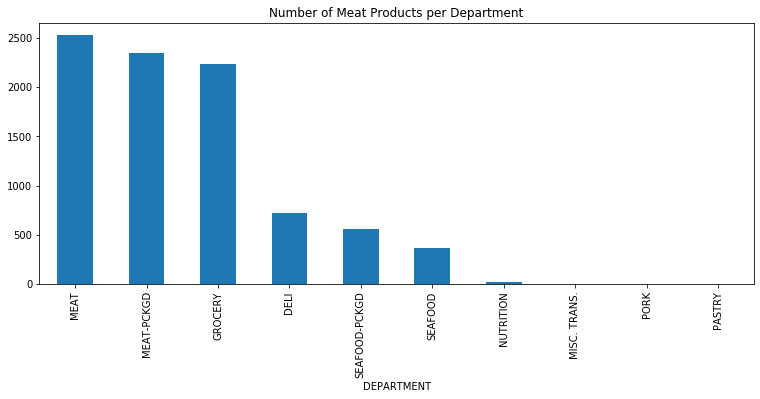

In [20]:
meat_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar(figsize = default_figsize)
plt.title('Number of Meat Products per Department');

In [21]:
percent = int(len(meat_products) * 100 / len(df_food_products))
print(f"We can see that {percent}% of the food products are meat related products.")

We can see that 17% of the food products are meat related products.


In [22]:
meat_products.to_csv('data/meat_products.csv')

## Pure Meat

In this part, we will make the distinction between two types of meat products. On one hand, we have all the products containing meat (see section above), a excell sheet we have just created. On other hand, we have pure meats such as (sausages, chicken etc.). So that we can perform deeper analysis.

In [23]:
drop_pure = [ 'DINNER MXS:DRY','PASTA SAUCE']
notpurewords = ["PIZZA", "SANDWICH","SANDWICHES","PASTA","CHILI", "STEW", "HASH","GRASS/SHRED","KITES","REGIONAL","ENTREES","BEANS",\
               "SAUCES","NOODLES","RICE","DAIRY","CONDIMENTS","SAUS","CHEESE","SPICES","BREADERS", "SAUCE", "HASHBROWN",\
               "SAUCESSALSAPICANTEE","MUSTARD"]
pure_meat = meat_products[meat_products['COMMODITY_DESC'].isin(drop_pure) == 0].copy()
notpure_regex = [r'\b%s\b' % word for word in notpurewords]
full_regex = re.compile('|'.join(notpure_regex))
pure_meat = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True) == 0]
print('There are {0} pure meat products distributed in {1} different departments.'.format(len(pure_meat['PRODUCT_ID'].unique()), len(pure_meat['DEPARTMENT'].unique())))

There are 6609 pure meat products distributed in 10 different departments.


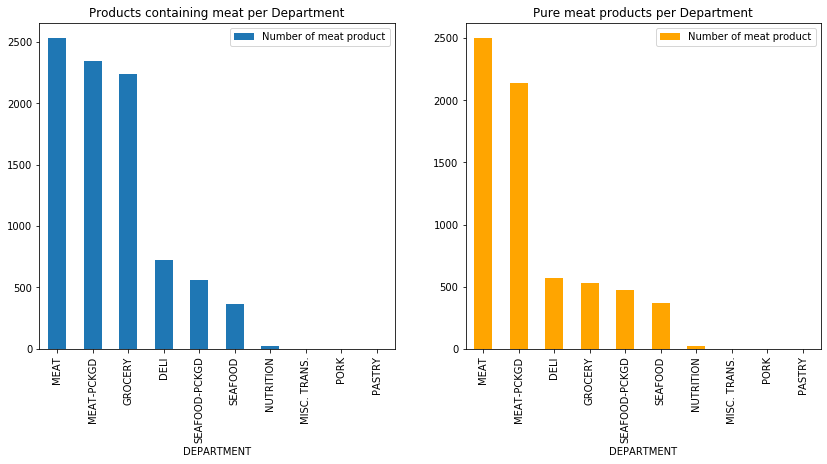

In [24]:
num_of_meat_per_dep = meat_products.groupby("DEPARTMENT").count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False).reset_index(name="Number of meat product")
pure_meat_per_dep = pure_meat.groupby("DEPARTMENT").count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False).reset_index(name="Number of meat product")

# plot histogram of normalized weights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
num_of_meat_per_dep.plot.bar(x="DEPARTMENT", y="Number of meat product",ax=axes[0])
axes[0].set_title("Products containing meat per Department")

# plot histogram of not-normalized weights
pure_meat_per_dep.plot.bar(x="DEPARTMENT", y="Number of meat product",ax=axes[1], color='orange')
axes[1].set_title("Pure meat products per Department");

In the previous plot, it is clearly seen that most of the Departments contained mainly pure meat products. However, the Grocery department is the exception, where pure meat products only make up to a quarter of the total meat products. 

After all this part of data scrapping and selecting pure meat products, we want to know which is the meat's proportion for each meat category. There are 5 main categories : pork meat, poultry, bovine meat, ovine meat and seafood. 

In [25]:
# TODO: Gather them with a function

In [26]:
# classify types of meats
pork_words = ['BACON', 'HAM','HAMS', 'PORK', 'SALAMI', 'LINKS', 'SAUSAGE']
bovine_words = ['BEEF', 'BUFFALO', 'VEAL']
ovine_words = ['GOAT', 'LAMB']
poultry_words = ['FOWL','THIGHS', 'DRUMS','CHICKEN','CHICK', 'CORNISH', 'DUCK', 'DUCKS', 'GOOSE', 'GROUSE', 'PHEASANT', 'TURKEY', 'POULTRY', 'HENS', 'BREAST','WINGS']
seafood_words = ['ANCHOVY', 'CATFISH', 'CLAMS', 'COD', 'CRAB', 'EEL', 'HALIBUT', 'LOBSTER', 'MACKEREL', 'MAHI MAHI', 'OCTOPUS', 'OYSTERS', 'QUAIL', 'SALMON', 'SARDINES', 'SCALLOPS', 'SHARK', 'SHRIMP', 'SQUAB', 'SQUID', 'SWORDFISH', 'TILAPIA', 'TUNA', 'SEAFOOD', 'FISH']
pork_regex = [r'\b%s\b' % word for word in pork_words]

full_pork_regex = re.compile('|'.join(pork_regex))
pork_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_pork_regex, regex=True) |\
                         pure_meat.COMMODITY_DESC.str.contains(full_pork_regex, regex=True) ]

bovine_regex = [r'\b%s\b' % word for word in bovine_words]
full_bovine_regex = re.compile('|'.join(bovine_regex))
bovine_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_bovine_regex, regex=True) |\
                         pure_meat.COMMODITY_DESC.str.contains(full_bovine_regex, regex=True)]

ovine_regex = [r'\b%s\b' % word for word in ovine_words]
full_ovine_regex = re.compile('|'.join(ovine_regex))
ovine_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_ovine_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_ovine_regex, regex=True)]

poultry_regex = [r'\b%s\b' % word for word in poultry_words]
full_poultry_regex = re.compile('|'.join(poultry_regex))
poultry_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_poultry_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_poultry_regex, regex=True)]

seafood_regex = [r'\b%s\b' % word for word in seafood_words]
full_seafood_regex = re.compile('|'.join(seafood_regex))
seafood_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_seafood_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_seafood_regex, regex=True)]

other_meat = pure_meat[(pure_meat.PRODUCT_ID.isin(pork_products.PRODUCT_ID) | pure_meat.PRODUCT_ID.isin(bovine_products.PRODUCT_ID)|\
                      pure_meat.PRODUCT_ID.isin(ovine_products.PRODUCT_ID) | pure_meat.PRODUCT_ID.isin(poultry_products.PRODUCT_ID) |\
                      pure_meat.PRODUCT_ID.isin(seafood_products.PRODUCT_ID)) == 0]

# correct inconsistences
pork_products = pork_products[pork_products.COMMODITY_DESC != "TURKEY"]
pork_products = pork_products[pork_products.SUB_COMMODITY_DESC != "SMOKED/COOKED - BEEF"]

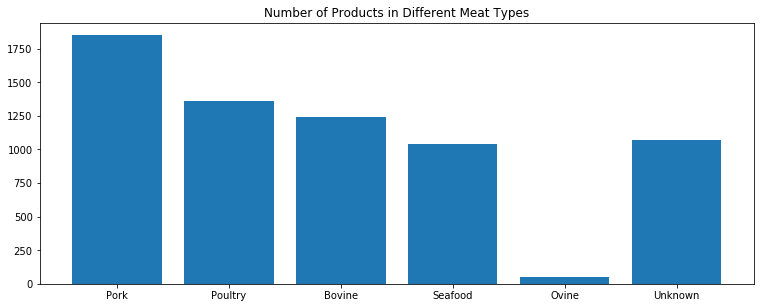

In [27]:
# plot meat types
x = np.arange(6)
y = [len(pork_products), len(poultry_products), len(bovine_products),  len(seafood_products), len(ovine_products), len(other_meat)]
plt.figure(figsize=default_figsize)
plt.bar(x, y)
plt.xticks(x, ( 'Pork', 'Poultry', 'Bovine','Seafood', 'Ovine', 'Unknown'))
plt.title('Number of Products in Different Meat Types')
plt.show()

We see that pork meat is the category with most products and that there are much less products in the ovine category than in the other categories. The "Unknown" category has the remaining products for which there is not enough information to classify in a category (e.g. sub-commodities with the words "burger" or "bbq").

In [28]:
pure_meat.to_csv('data/pure_meat_products.csv')

## Vegetables Data

In [29]:
veggies = [
    "asparagus",
    "beans",
    "beet",
    "broccoli",
    "Brussels sprouts",
    "cabbage",
    "carrot",
    "carrots",
    "cauliflower",
    "celery",
    "Chinese cabbage",
    "corn",
    "cucumber",
    "cucumbers",
    "eggplant",
    "eggplants",
    "green pepper",
    "Japanese radish",
    "kale",
    "lettuce",
    "salad",
    "okra",
    "onion",
    "onions",
    "peas",
    "pumpkins",
    "radish",
    "spinach",
    "sweet potato",
    "tomatoes",
    "tomato",
    "turnips",
    "vegetables"
]
veggies = [v.upper() for v in veggies]

In [30]:
veggie_words_regex = [r'\b%s\b' % word for word in veggies]
full_regex = re.compile('|'.join(veggie_words_regex))

veggie_products = df_products[df_food_products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                           df_products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]


In [31]:
print('Unique commodity description for vegie products:')
print('---------------------------------------------------')
veggie_products.COMMODITY_DESC.unique()

Unique commodity description for vegie products:
---------------------------------------------------


array(['SHORTENING/OIL', 'VEGETABLES - SHELF STABLE', 'HISPANIC',
       'FRZN VEGETABLE/VEG DSH', 'CANNED JUICES',
       'BEANS - CANNED GLASS & MW', 'DRY BN/VEG/POTATO/RICE',
       'ORGANICS FRUIT & VEGETABLES', 'CONDIMENTS/SAUCES',
       'SALD DRSNG/SNDWCH SPRD', 'FROZEN MEAT', 'FRUIT - SHELF STABLE',
       'SALAD MIX', 'CARROTS', 'VEGETABLES - ALL OTHERS', 'CORN',
       'BAG SNACKS', 'BAKING MIXES', 'BROCCOLI/CAULIFLOWER', 'ONIONS',
       'CRACKERS/MISC BKD FD', 'SPICES & EXTRACTS', 'VEGETABLES SALAD',
       'VALUE ADDED VEGETABLES', 'TOMATOES', 'SALAD BAR', 'FROZEN',
       'PREPARED/PKGD FOODS', 'HERBS', 'SALADS/DIPS', 'BAKING NEEDS',
       'SOUP', 'SEASONAL', 'UNKNOWN', 'MEAT - SHELF STABLE',
       'PROD SUPPLIES', 'DELI SPECIALTIES (RETAIL PK)', 'FROZEN PIZZA'],
      dtype=object)

In [32]:
drops_vegg = ['SHORTENING/OIL','CONDIMENTS/SAUCES', 'SALD DRSNG/SNDWCH SPRD', 'FROZEN MEAT','BAG SNACKS', 'BAKING MIXES',\
             'CRACKERS/MISC BKD FD', 'SPICES & EXTRACTS','BAKING NEEDS','MEAT - SHELF STABLE','DELI SPECIALTIES (RETAIL PK)', 'FROZEN PIZZA']
veggie_products = veggie_products[veggie_products['COMMODITY_DESC'].isin(drops_vegg) == 0]
print('There are {0} veggetables products distributed in {1} different departments.'.format(len(veggie_products['PRODUCT_ID'].unique()), len(veggie_products['DEPARTMENT'].unique())))

There are 3209 veggetables products distributed in 7 different departments.


In [33]:
percent = int(len(veggie_products) * 100 / len(df_food_products))
print(f"We can see that {percent}% of the food products are vegetables products.")

We can see that 6% of the food products are vegetables products.


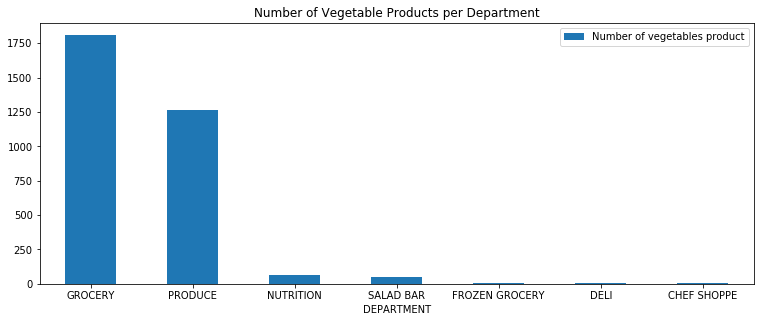

In [34]:
num_of_veg_per_dep = veggie_products.groupby("DEPARTMENT").count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False).reset_index(name="Number of vegetables product")
num_of_veg_per_dep.plot.bar(x="DEPARTMENT", y="Number of vegetables product", figsize = default_figsize, rot = 0)
plt.title('Number of Vegetable Products per Department');

In [35]:
veggie_products.to_csv('data/vegetables_products.csv')

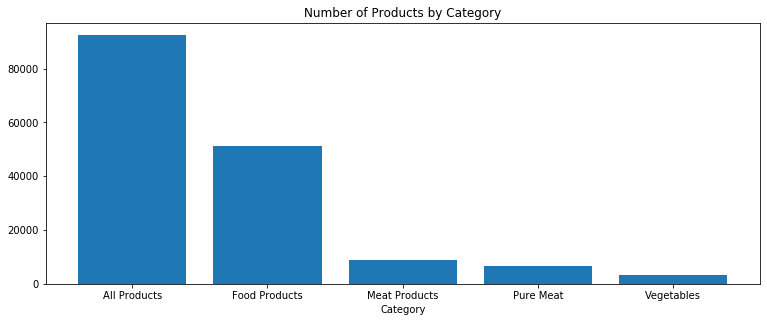

In [36]:
x = np.arange(5)
y = [len(df_products), len(df_food_products), len(meat_products),  len(pure_meat), len(veggie_products)]
plt.figure(figsize = default_figsize)
plt.bar( x, y)
plt.xticks(x, ( 'All Products', 'Food Products', 'Meat Products','Pure Meat', 'Vegetables'))
plt.xlabel("Category")
plt.title("Number of Products by Category")
plt.show()